In [3]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K

from sklearn.metrics import classification_report
from keras.optimizers import SGD,Adam
from keras.datasets import mnist
from keras.utils import np_utils
from keras import backend as K
from imutils import build_montages
import matplotlib.pyplot as plt
import numpy as np
import cv2



Using TensorFlow backend.


In [0]:
width=28
height=28
depth=1
classes=10
chanDim = -1
 
model = Sequential()
inputShape = (height, width, depth)
# first CONV => RELU => CONV => RELU => POOL layer set

model.add(Conv2D(32, (3, 3), padding="same",
input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))

model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# second CONV => RELU => CONV => RELU => POOL layer set
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# first (and only) set of FC => RELU layers
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
 
# softmax classifier
model.add(Dense(classes))
model.add(Activation("softmax"))


In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)       

In [0]:
NUM_EPOCHS = 25
INIT_LR = .01
BS = 25

In [7]:
# grab the Fashion MNIST dataset (if this is your first time running
# this the dataset will be automatically downloaded)
print("[INFO] loading Fashion MNIST...")
((trainX, trainY), (testX, testY)) = mnist.load_data()
 

# if we are using "channels first" ordering, then reshape the design
# matrix such that the matrix is:
# 	num_samples x depth x rows x columns
if K.image_data_format() == "channels_first":
	trainX = trainX.reshape((trainX.shape[0], 1, 28, 28))
	testX = testX.reshape((testX.shape[0], 1, 28, 28))
 
# otherwise, we are using "channels last" ordering, so the design
# matrix shape should be: num_samples x rows x columns x depth
else:
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
 
trainX =  trainX[:100]
trainY = trainY[:100]


[INFO] loading Fashion MNIST...
11493376/11490434 [==============================] - 2s 0us/step


In [0]:
# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0
 
# one-hot encode the training and testing labels
trainY = np_utils.to_categorical(trainY, 10)
testY = np_utils.to_categorical(testY, 10)
 
# initialize the label names
labelNames = ["0","1","2","3","4","5","6","7","8","9"]


In [9]:
# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=INIT_LR, momentum=0.9, decay=INIT_LR / NUM_EPOCHS)

model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
 
# train the network
print("[INFO] training model...")
H = model.fit(trainX, trainY,
	validation_data=(testX, testY),
	batch_size=BS, epochs=NUM_EPOCHS)

[INFO] compiling model...
[INFO] training model...
Train on 100 samples, validate on 10000 samples
Epoch 1/25
100/100 [==============================] - 9s 91ms/step - loss: 3.6942 - accuracy: 0.1500 - val_loss: 2.1980 - val_accuracy: 0.2284
Epoch 2/25
100/100 [==============================] - 1s 14ms/step - loss: 1.4284 - accuracy: 0.5400 - val_loss: 2.3054 - val_accuracy: 0.2473
Epoch 3/25
100/100 [==============================] - 1s 14ms/step - loss: 0.6479 - accuracy: 0.8200 - val_loss: 3.9331 - val_accuracy: 0.3290
Epoch 4/25
100/100 [==============================] - 1s 14ms/step - loss: 0.4355 - accuracy: 0.8700 - val_loss: 6.2879 - val_accuracy: 0.3174
Epoch 5/25
100/100 [==============================] - 1s 14ms/step - loss: 0.2805 - accuracy: 0.9100 - val_loss: 8.0927 - val_accuracy: 0.2757
Epoch 6/25
100/100 [==============================] - 1s 14ms/step - loss: 0.1472 - accuracy: 0.9600 - val_loss: 8.1183 - val_accuracy: 0.2929
Epoch 7/25
100/100 [=======================

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       980
           1       0.60      0.99      0.75      1135
           2       0.85      0.42      0.56      1032
           3       0.80      0.80      0.80      1010
           4       0.44      0.91      0.59       982
           5       0.91      0.13      0.23       892
           6       0.88      0.65      0.75       958
           7       0.91      0.77      0.83      1028
           8       0.67      0.52      0.59       974
           9       0.48      0.53      0.50      1009

    accuracy                           0.67     10000
   macro avg       0.74      0.66      0.65     10000
weighted avg       0.74      0.67      0.65     10000



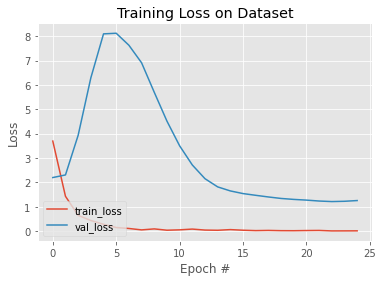

In [10]:
# make predictions on the test set
preds = model.predict(testX)
 
# show a nicely formatted classification report
print("[INFO] evaluating network...")
print(classification_report(testY.argmax(axis=1), preds.argmax(axis=1),
	target_names=labelNames))
 
# plot the training loss and accuracy
N = NUM_EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")

plt.title("Training Loss on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.savefig("plot.png")

In [11]:
import statistics
statistics.mean(H.history["val_accuracy"])

0.529083999991417

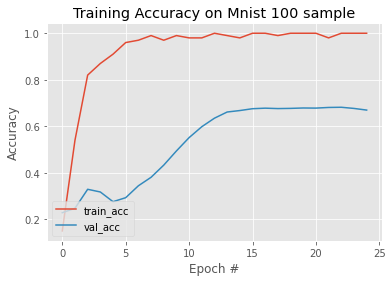

In [12]:
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")

plt.title("Training Accuracy on Mnist 100 sample")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")